This data reflects the personal information of some NFL players. 

In [2]:
#Import relevant data libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [3]:
#import csv file from local machine to a dataframe named 'df'
df = pd.read_csv('/Users/macos/Downloads/American Football Team Data1.csv', on_bad_lines='skip', engine="python")


Step 1 - Carry out some Explorative Data Analysis(EDA) on the dataset

In [4]:
#View quick summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1034 non-null   object 
 1    "Team"            1034 non-null   object 
 2    "Position"        1034 non-null   object 
 3    "Height(inches)"  1034 non-null   int64  
 4    "Weight(lbs)"     1034 non-null   object 
 5    "Age"             1034 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 48.6+ KB


In [5]:
# number of rows and columns in dataframe
df.shape

(1034, 6)

In [6]:
#Quick view of first 5 rows of dataframe
df.head()

,Name,"""Team""","""Position""","""Height(inches)""","""Weight(lbs)""","""Age"""
0,Adam Donachie,"""BAL""","""Catcher""",74,180,22.99
1,Paul Bako,"""BAL""","""Catcher""",74,215,34.69
2,Ramon Hernandez,"""BAL""","""Catcher""",72,210,30.78
3,Kevin Millar,"""BAL""","""First Baseman""",72,210,35.43
4,Chris Gomez,"""BAL""","""First Baseman""",73,188,35.71


In [7]:
# Some column names appear to have unnecessary quotes " " and a blank leading space . This code investigates
df.columns

Index(['Name', ' "Team"', ' "Position"', ' "Height(inches)"', ' "Weight(lbs)"',
       ' "Age"'],
      dtype='object')

In [8]:
df.index 

RangeIndex(start=0, stop=1034, step=1)

In [9]:
#Remove quote sign "" and preceeding space from columns "Team", "Position" etc  to avoid mixups later 
df.rename(columns={' "Team"': 'Team' , ' "Position"': 'Position', ' "Height(inches)"' : 'Height(in)', ' "Weight(lbs)"' : 'Weight(lbs)',
       ' "Age"': 'Age'}, inplace=True)
# Above could be done with a much easier list assignment: df.columns = ['Team', 'Position', 'Height(in)', 'Weight(lbs)', 'Age']
df.head()

,Name,Team,Position,Height(in),Weight(lbs),Age
0,Adam Donachie,"""BAL""","""Catcher""",74,180,22.99
1,Paul Bako,"""BAL""","""Catcher""",74,215,34.69
2,Ramon Hernandez,"""BAL""","""Catcher""",72,210,30.78
3,Kevin Millar,"""BAL""","""First Baseman""",72,210,35.43
4,Chris Gomez,"""BAL""","""First Baseman""",73,188,35.71


In [10]:
#Replace "" quotes from the Team and Position column data with an empty string ''
df['Team'] = df['Team'].str.replace('"', '')
df['Position'] = df['Position'].str.replace('"', '')
df[['Team', 'Position']].head()

,Team,Position
0,BAL,Catcher
1,BAL,Catcher
2,BAL,Catcher
3,BAL,First Baseman
4,BAL,First Baseman


In [11]:
#Preecing space found in Weight(lbs) and Position column data
df['Weight(lbs)'].unique()
#df['Position'].unique()

array([' 180', ' 215', ' 210', ' 188', ' 176', ' 209', ' 200', ' 231',
       ' 185', ' 160', ' 197', ' 189', ' 219', ' 230', ' 205', ' 195',
       ' 192', ' 225', ' 203', ' 182', ' 245', ' 240', ' 175', ' 199',
       ' 206', ' 186', ' 220', ' 244', ' 212', ' 224', ' 260', ' 228',
       ' 270', ' 190', ' 211', ' 170', ' 155', ' 235', ' 250', ' 222',
       ' 213', ' 194', ' 198', ' 178', ' 204', ' 290', ' 201', ' 226',
       ' 233', ' 237', ' 165', ' 208', ' 241', ' 278', ' 184', ' 218',
       ' 167', ' 232', ' 202', ' 193', ' 150', ' 172', ' 177', ' 187',
       ' 214', ' 191', ' 181', ' 229', ' 234', ' 223', ' 227', ' 275',
       ' 249', ' 221', ' 164', ' 255', ' 254', ' 239', ' ""', ' 168',
       ' 156', ' 217', ' 183', ' 196', ' 216', ' 257', ' 246', ' 207',
       ' 238', ' 163'], dtype=object)

In [12]:
#Strip 'Weight(lbs) and Position' columns values of their preceeding empty space 
df['Weight(lbs)'] = df['Weight(lbs)'].str.lstrip()
df['Position'] = df['Position'].str.lstrip()

#df['Weight(lbs)'].unique()
df['Position'].unique()

array(['Catcher', 'First Baseman', 'Second Baseman', 'Shortstop',
       'Third Baseman', 'Outfielder', 'Designated Hitter',
       'Starting Pitcher', 'Relief Pitcher'], dtype=object)

In [13]:
#Retrieve all rows where Weight(lbs) value is ""
df[df['Weight(lbs)'].isin(['""'])]
# Alternatively, we could perform same task with this code: df.loc[df['Weight(lbs)'] == '""']

,Name,Team,Position,Height(in),Weight(lbs),Age
640,Kirk Saarloos,CIN,Starting Pitcher,72,"""""",27.77


In [14]:
#Replace the "" value of Weight(lbs) in row 640 temporarily with zero 0
df.replace('""', '0', inplace=True )
#Check replaced value 
df[df['Weight(lbs)'].isin(['0'])]

,Name,Team,Position,Height(in),Weight(lbs),Age
640,Kirk Saarloos,CIN,Starting Pitcher,72,0,27.77


In [15]:
df['Weight(lbs)'].unique()

array(['180', '215', '210', '188', '176', '209', '200', '231', '185',
       '160', '197', '189', '219', '230', '205', '195', '192', '225',
       '203', '182', '245', '240', '175', '199', '206', '186', '220',
       '244', '212', '224', '260', '228', '270', '190', '211', '170',
       '155', '235', '250', '222', '213', '194', '198', '178', '204',
       '290', '201', '226', '233', '237', '165', '208', '241', '278',
       '184', '218', '167', '232', '202', '193', '150', '172', '177',
       '187', '214', '191', '181', '229', '234', '223', '227', '275',
       '249', '221', '164', '255', '254', '239', '0', '168', '156', '217',
       '183', '196', '216', '257', '246', '207', '238', '163'],
      dtype=object)

In [16]:
#Recast Weight(lbs) column as type int
df['Weight(lbs)'] = df['Weight(lbs)'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1034 non-null   object 
 1   Team         1034 non-null   object 
 2   Position     1034 non-null   object 
 3   Height(in)   1034 non-null   int64  
 4   Weight(lbs)  1034 non-null   int64  
 5   Age          1034 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 48.6+ KB


In [17]:
#Find mean weight and mean age of each position. 
df.groupby(['Position','Team'])[['Weight(lbs)', 'Age']].agg(['mean', 'min', 'max'])

Weight(lbs)                  Age              
                          mean  min  max       mean    min    max
Position      Team                                               
Catcher        ANA  201.666667  180  220  26.996667  23.92  31.74
               ARZ  208.500000  197  220  24.845000  23.64  26.05
               ATL  215.000000  210  220  24.085000  23.03  25.14
               BAL  201.666667  180  215  29.486667  22.99  34.69
               BOS  210.000000  180  230  31.683333  23.79  36.37
...                        ...  ...  ...        ...    ...    ...
Third Baseman  STL  230.000000  220  240  33.175000  31.91  34.44
               TB   180.000000  180  180  22.520000  22.52  22.52
               TEX  200.000000  200  200  26.270000  26.27  26.27
               TOR  225.000000  210  240  28.790000  27.01  30.57
               WAS  210.000000  210  210  22.420000  22.42  22.42

[253 rows x 6 columns]

In [18]:
df.groupby(['Position','Team'], as_index=False).agg(
    avg_player_weight = ('Weight(lbs)', 'mean'),
    avg_player_age = ('Age', 'mean')
    
                            
)

,Position,Team,avg_player_weight,avg_player_age
0,Catcher,ANA,201.666667,26.996667
1,Catcher,ARZ,208.500000,24.845000
2,Catcher,ATL,215.000000,24.085000
3,Catcher,BAL,201.666667,29.486667
4,Catcher,BOS,210.000000,31.683333
...,...,...,...,...
248,Third Baseman,STL,230.000000,33.175000
249,Third Baseman,TB,180.000000,22.520000
250,Third Baseman,TEX,200.000000,26.270000
251,Third Baseman,TOR,225.000000,28.790000


In [19]:
#Temporary zero value can now be set to Starting Pitcher mean weight 
df.iloc[640,4] = 204
#Check
df.iloc[[640]]

,Name,Team,Position,Height(in),Weight(lbs),Age
640,Kirk Saarloos,CIN,Starting Pitcher,72,204,27.77


In [20]:
#df.loc[(df['Position']=='Starting Pitcher')]
df.loc[(df['Position'] == 'Starting Pitcher'), ['Position','Weight(lbs)', 'Team']]
#df[df['Position'].str.contains('Starting Pitcher')]

,Position,Weight(lbs),Team
17,Starting Pitcher,189,BAL
18,Starting Pitcher,185,BAL
19,Starting Pitcher,219,BAL
20,Starting Pitcher,230,BAL
21,Starting Pitcher,205,BAL
...,...,...,...
1018,Starting Pitcher,208,STL
1019,Starting Pitcher,215,STL
1020,Starting Pitcher,180,STL
1021,Starting Pitcher,200,STL


Having prepared data, we begin the process of data visualization. 

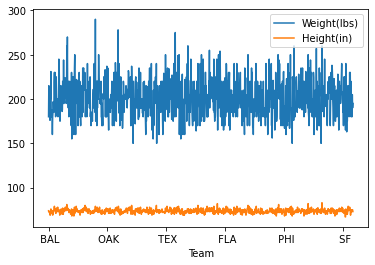

In [21]:
#To visualize the team with the biggest players in our dataset i.e heaviest + tallest
#This is a multivariate analysis i.e we are looking at more than 2 variables; Team, height and weight.
df.plot(x='Team', y=['Weight(lbs)', 'Height(in)'])
plt.show()

In [22]:
df[df['Team'].str.contains('BAL')].set_index(['Age','Height(in)'])


,,Name,Team,Position,Weight(lbs)
Age,Height(in),,,,
22.99,74,Adam Donachie,BAL,Catcher,180
34.69,74,Paul Bako,BAL,Catcher,215
30.78,72,Ramon Hernandez,BAL,Catcher,210
35.43,72,Kevin Millar,BAL,First Baseman,210
35.71,73,Chris Gomez,BAL,First Baseman,188
29.39,69,Brian Roberts,BAL,Second Baseman,176
30.77,69,Miguel Tejada,BAL,Shortstop,209
35.07,71,Melvin Mora,BAL,Third Baseman,200
30.19,76,Aubrey Huff,BAL,Third Baseman,231


In [23]:
df[['Position', 'Weight(lbs)', 'Height(in)']].value_counts(sort=False)[-5:]

Position       Weight(lbs)  Height(in)
Third Baseman  220          74            1
               230          76            1
               231          76            1
               240          76            1
                            77            1
dtype: int64

In [24]:
df[['Team', 'Age']].value_counts()[:15]

Team  Age  
 HOU  30.06    2
 TOR  24.94    2
 TEX  26.66    2
 COL  25.18    2
 KC   29.09    2
 WAS  25.24    2
 PIT  26.36    2
      29.19    2
 ARZ  26.77    2
 OAK  27.56    2
 FLA  23.08    2
 NYM  24.19    2
 SD   26.01    2
 CHC  31.15    2
 TOR  30.95    2
dtype: int64

In [25]:
df['Height(in)'].value_counts()
#df['Weight(lbs)'].max()

74    175
73    167
75    160
72    152
76    103
71     89
77     57
70     52
78     27
69     19
79     14
68      7
80      5
81      2
82      2
67      2
83      1
Name: Height(in), dtype: int64

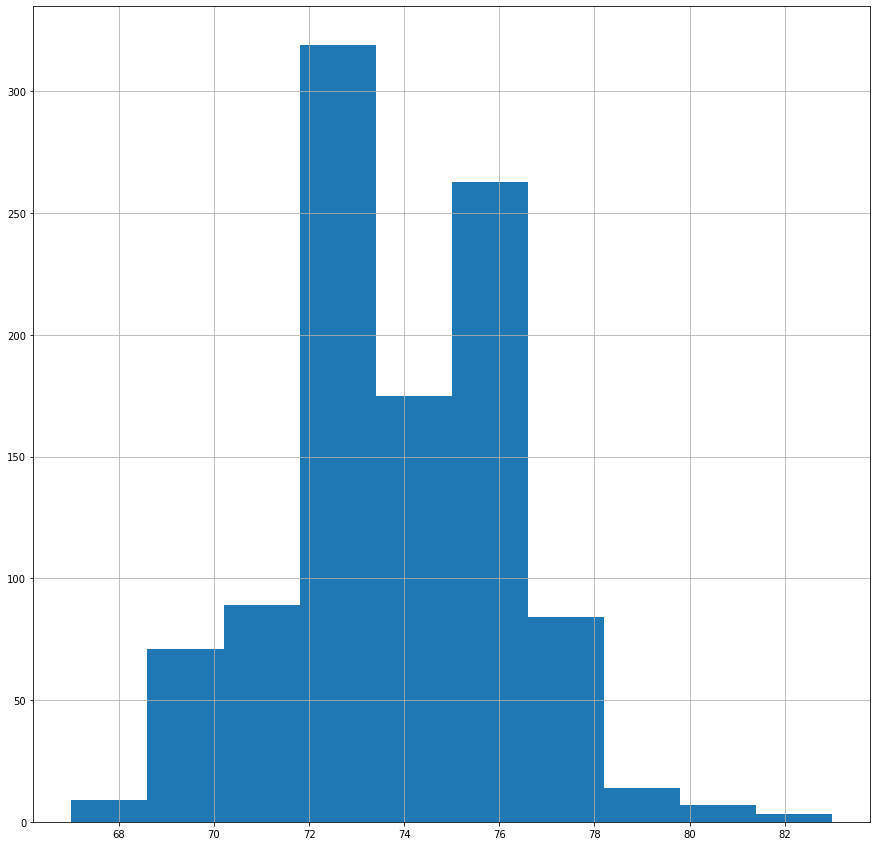

In [26]:
#This is a univariate analysis i.e we are looking at just one variable, weight.
df['Height(in)'].hist(figsize=(15,15))
plt.show()

In [27]:
#avg_position_weight = df.groupby('Position')[['Weight(lbs)','Height(in)']].mean()       #Average Weight and Height for each Position
#Average Weight for each Position
avg_position_weight = df.groupby('Position', as_index=False).agg(AverageWeight = ('Weight(lbs)', 'mean'))
avg_position_weight

,Position,AverageWeight
0,Catcher,204.328947
1,Designated Hitter,220.888889
2,First Baseman,213.109091
3,Outfielder,199.113402
4,Relief Pitcher,203.517460
5,Second Baseman,184.344828
6,Shortstop,182.923077
7,Starting Pitcher,205.158371
8,Third Baseman,200.955556


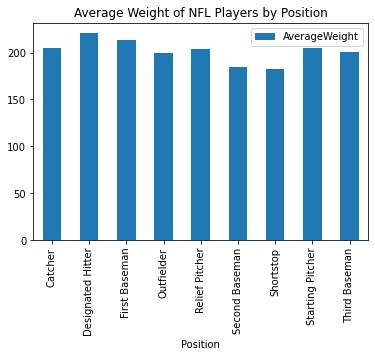

In [28]:
avg_position_weight.plot(x='Position', y='AverageWeight',kind='bar', title='Average Weight of NFL Players by Position', rot=90)
plt.show()

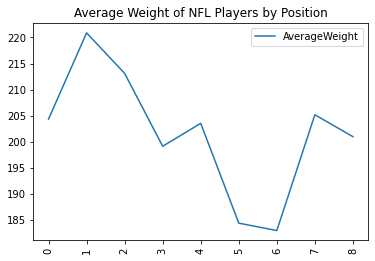

In [29]:
avg_position_weight.plot(title='Average Weight of NFL Players by Position', rot=90, kind='line')
plt.show()

In [30]:
df.groupby('Position')['Height(in)'].nsmallest(3)

Position               
Catcher            243     69
                   280     70
                   315     70
Designated Hitter  191     70
                   16      72
                   260     73
First Baseman      75      70
                   560     70
                   762     71
Outfielder         86      68
                   773     68
                   14      69
Relief Pitcher     827     68
                   1025    69
                   339     70
Second Baseman     1007    67
                   867     68
                   972     68
Shortstop          1008    67
                   801     68
                   6       69
Starting Pitcher   670     69
                   504     70
                   576     70
Third Baseman      79      68
                   459     69
                   461     69
Name: Height(in), dtype: int64

In [31]:
df.iloc[243]

Name           Ivan Rodriguez
Team                      DET
Position              Catcher
Height(in)                 69
Weight(lbs)               218
Age                     35.25
Name: 243, dtype: object

In [32]:
#Sort data by team and height. Sort starts from Team in descending alphabetical order. Original indexing is retained
sort_data = df.sort_values(by=['Team','Height(in)'], ascending=False, ignore_index=False)
sort_data

,Name,Team,Position,Height(in),Weight(lbs),Age
928,Jon Rauch,WAS,Relief Pitcher,83,260,28.42
913,Billy Traber,WAS,Starting Pitcher,77,205,27.45
915,John Patterson,WAS,Starting Pitcher,77,208,29.08
899,Larry Broadway,WAS,First Baseman,76,230,26.20
909,Mike Restovich,WAS,Outfielder,76,257,28.16
...,...,...,...,...,...,...
75,Howie Kendrick,ANA,First Baseman,70,180,23.64
76,Orlando Cabrera,ANA,Shortstop,70,190,32.33
77,Erick Aybar,ANA,Shortstop,70,170,23.13
79,Maicer Izturis,ANA,Third Baseman,68,155,26.46


In [33]:
#Group sort_data above by team and find 2nd tallest player on each team

sort_data.groupby('Team').nth(1)

,Name,Position,Height(in),Weight(lbs),Age
Team,,,,,
ANA,John Lackey,Starting Pitcher,78,235,28.35
ARZ,Tony Clark,First Baseman,79,245,34.71
ATL,T.J. Bohn,Outfielder,77,200,27.12
BAL,Adam Loewen,Starting Pitcher,78,219,22.89
BOS,Craig Hansen,Relief Pitcher,78,210,23.29
CHC,Derrek Lee,First Baseman,77,245,31.48
CIN,Adam Dunn,Outfielder,78,240,27.31
CLE,Tom Mastny,Relief Pitcher,78,220,26.07
COL,Ryan Speier,Relief Pitcher,79,200,27.60


In [34]:
#Sort team ANA players by height in descending order
df[df['Team'].str.contains('ANA')].sort_values('Height(in)', ascending=False)

,Name,Team,Position,Height(in),Weight(lbs),Age
94,Jered Weaver,ANA,Starting Pitcher,79,205,24.41
88,John Lackey,ANA,Starting Pitcher,78,235,28.35
97,Justin Speier,ANA,Relief Pitcher,76,205,33.31
78,Dallas McPherson,ANA,Third Baseman,76,230,26.60
91,Dustin Moseley,ANA,Starting Pitcher,76,190,37.74
85,Vladimir Guerrero,ANA,Outfielder,75,220,31.06
84,Garret Anderson,ANA,Outfielder,75,225,34.67
71,Casey Kotchman,ANA,First Baseman,75,210,24.02
95,Chris Resop,ANA,Relief Pitcher,75,222,24.32
82,Terry Evans,ANA,Outfielder,75,200,25.11


In [35]:
df.groupby('Team').agg(
    avg_team_age = ("Age", lambda x: round(x.mean(),1))
    
)

,avg_team_age
Team,
ANA,28.8
ARZ,27.8
ATL,28.3
BAL,29.1
BOS,29.8
CHC,28.4
CIN,29.9
CLE,28.4
COL,28.1


In [36]:
df.groupby('Position').get_group('Catcher')

,Name,Team,Position,Height(in),Weight(lbs),Age
0,Adam Donachie,BAL,Catcher,74,180,22.99
1,Paul Bako,BAL,Catcher,74,215,34.69
2,Ramon Hernandez,BAL,Catcher,72,210,30.78
35,A.J. Pierzynski,CWS,Catcher,75,245,30.17
36,Toby Hall,CWS,Catcher,75,240,31.36
...,...,...,...,...,...,...
934,Ronny Paulino,PIT,Catcher,75,215,25.86
968,Bengie Molina,SF,Catcher,71,220,32.61
969,Eliezer Alfonzo,SF,Catcher,72,223,28.06
1002,Gary Bennett,STL,Catcher,72,208,34.87


In [37]:
df.head()

,Name,Team,Position,Height(in),Weight(lbs),Age
0,Adam Donachie,BAL,Catcher,74,180,22.99
1,Paul Bako,BAL,Catcher,74,215,34.69
2,Ramon Hernandez,BAL,Catcher,72,210,30.78
3,Kevin Millar,BAL,First Baseman,72,210,35.43
4,Chris Gomez,BAL,First Baseman,73,188,35.71


In [38]:
df['Team'] = df['Team'].str.lstrip()

In [39]:
df.head()

,Name,Team,Position,Height(in),Weight(lbs),Age
0,Adam Donachie,BAL,Catcher,74,180,22.99
1,Paul Bako,BAL,Catcher,74,215,34.69
2,Ramon Hernandez,BAL,Catcher,72,210,30.78
3,Kevin Millar,BAL,First Baseman,72,210,35.43
4,Chris Gomez,BAL,First Baseman,73,188,35.71


In [40]:
df['Team'].unique()

array(['BAL', 'CWS', 'ANA', 'BOS', 'CLE', 'OAK', 'NYY', 'DET', 'SEA',
       'TB', 'KC', 'TEX', 'TOR', 'MIN', 'ATL', 'CHC', 'ARZ', 'FLA', 'CIN',
       'COL', 'NYM', 'HOU', 'LA', 'PHI', 'MLW', 'SD', 'WAS', 'PIT', 'SF',
       'STL'], dtype=object)

In [41]:
df.groupby(['Team', 'Position']).get_group(('LA', 'Outfielder'))

,Name,Team,Position,Height(in),Weight(lbs),Age
771,Matt Kemp,LA,Outfielder,76,230,22.43
772,Andre Ethier,LA,Outfielder,73,208,24.89
773,Delwyn Young,LA,Outfielder,68,209,24.67
774,Jason Repko,LA,Outfielder,71,175,26.17
775,Juan Pierre,LA,Outfielder,72,180,29.54
776,Luis Gonzalez,LA,Outfielder,74,200,39.49


In [42]:
df

,Name,Team,Position,Height(in),Weight(lbs),Age
0,Adam Donachie,BAL,Catcher,74,180,22.99
1,Paul Bako,BAL,Catcher,74,215,34.69
2,Ramon Hernandez,BAL,Catcher,72,210,30.78
3,Kevin Millar,BAL,First Baseman,72,210,35.43
4,Chris Gomez,BAL,First Baseman,73,188,35.71
...,...,...,...,...,...,...
1029,Brad Thompson,STL,Relief Pitcher,73,190,25.08
1030,Tyler Johnson,STL,Relief Pitcher,74,180,25.73
1031,Chris Narveson,STL,Relief Pitcher,75,205,25.19
1032,Randy Keisler,STL,Relief Pitcher,75,190,31.01


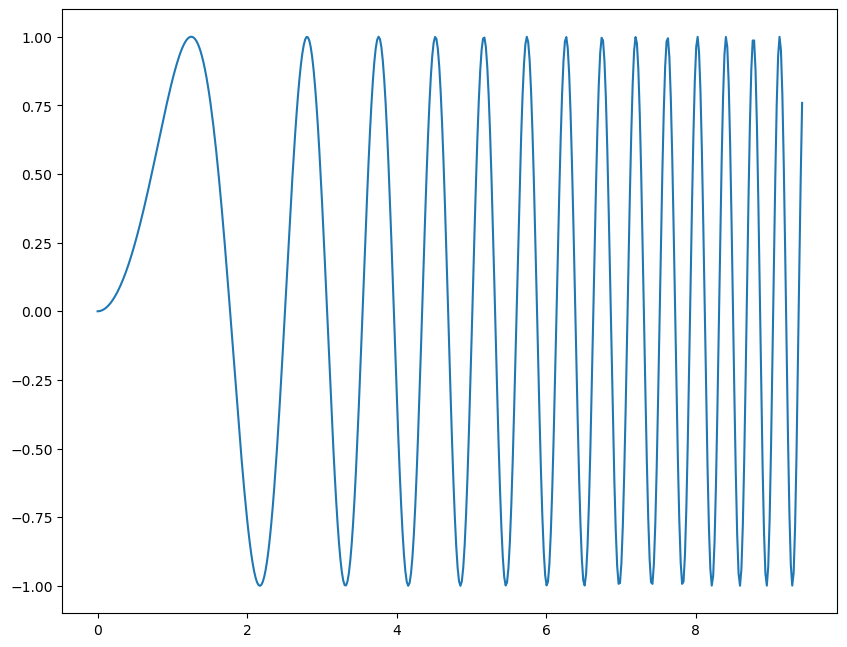

In [43]:
x = np.linspace(0, 3*np.pi, 500)
plt.figure(figsize=(10,8), dpi=100)
plt.plot(x, np.sin(x**2))

